## 1. Duomenų nuskaitymas

Rasta 3000 vaizdai (-ų). Pirmi keli failai:
['I01_01_1.bmp', 'i01_01_2.bmp', 'i01_01_3.bmp', 'i01_01_4.bmp', 'i01_01_5.bmp']


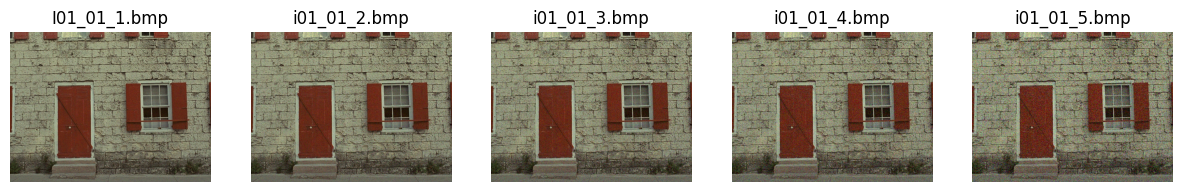

In [32]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np


# 1. Nustatykite kelią iki vaizdų aplanko vietinėje sistemoje
image_folder_path = "C:\\Users\\austeja.rusenaite\\Desktop\\tid2013\\distorted_images"

# 2. Nuskaitome visus failus iš aplanko
image_files = [f for f in os.listdir(image_folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp'))]

if not image_files:
    print("Aplanke nerasta vaizdų. Patikrinkite kelią arba failų formatą.")
else:
    print(f"Rasta {len(image_files)} vaizdai (-ų). Pirmi keli failai:")
    print(image_files[:5])

# 3. Funkcija vaizdams nuskaityti ir atvaizduoti
def display_images(image_files, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_files[:num_images]):
        img_path = os.path.join(image_folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV naudoja BGR, reikia konvertuoti į RGB

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)
    plt.show()

# 4. Atvaizduojame pirmus penkis vaizdus
display_images(image_files)


## 2. Vaizdų iškraipymų analizė ir vizualizacija

Naudojant OpenCV ir matplotlib, vizualizuokite dažniausius vaizdo kokybės sumažėjimo tipus: suliejimą (blur), triukšmą (noise), suspaudimo artefaktus (JPEG blokavimą).   
Paaiškinkite šių artefaktų poveikį kokybei.

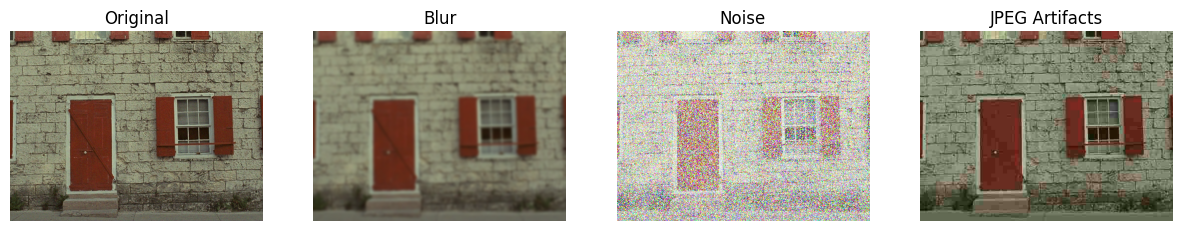

In [33]:
# 5. Vaizdų iškraipymų analizė ir vizualizacija
def apply_blur(img):
    return cv2.GaussianBlur(img, (15, 15), 0)

def add_noise(img):
    noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
    noisy_img = cv2.add(img, noise)
    return np.clip(noisy_img, 0, 255)

def apply_jpeg_artifacts(img):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 10]  # Sumažintas JPEG kokybės parametras
    result, encimg = cv2.imencode('.jpg', img, encode_param)
    decimg = cv2.imdecode(encimg, 1)
    return decimg

def visualize_artifacts(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blur_img = apply_blur(img_rgb)
    noisy_img = add_noise(img_rgb)
    jpeg_img = apply_jpeg_artifacts(img_rgb)

    titles = ["Original", "Blur", "Noise", "JPEG Artifacts"]
    images = [img_rgb, blur_img, noisy_img, jpeg_img]

    plt.figure(figsize=(15, 5))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(titles[i])
    plt.show()

# Analizuojame ir vizualizuojame pirmą vaizdą
def analyze_first_image():
    if image_files:
        first_image_path = os.path.join(image_folder_path, image_files[0])
        img = cv2.imread(first_image_path)
        visualize_artifacts(img)
    else:
        print("Nėra vaizdų analizės atlikimui.")

analyze_first_image()

## 3. Objektyvūs kokybės metrikos su etaloninėmis nuotraukomis
Įgyvendinkite PSNR (Peak Signal-to-Noise Ratio) ir SSIM (Structural Similarity Index) algoritmus.   
Palyginkite skirtingų sugadintų vaizdų kokybę su originaliais vaizdais.

--- Kokybės metrikų palyginimas ---
Blur: PSNR=21.68, SSIM=0.3846
Noise: PSNR=8.69, SSIM=0.1951
JPEG Artifacts: PSNR=24.81, SSIM=0.6888


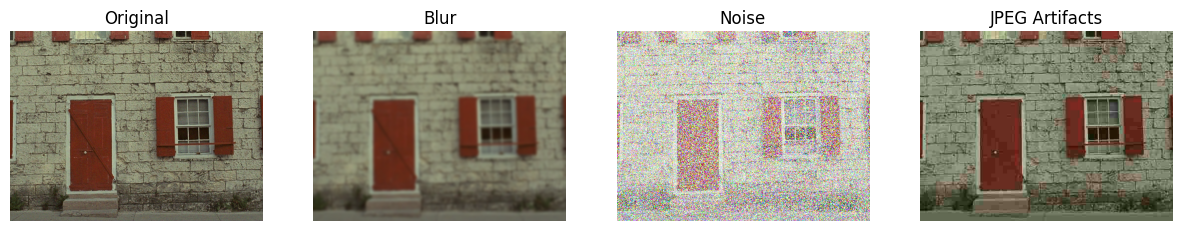

In [34]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# PSNR ir SSIM kokybės metrikos

def compute_quality_metrics(original_img, distorted_img):
    # Konvertuojame į pilką atspalvį, jei reikia
    original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    distorted_gray = cv2.cvtColor(distorted_img, cv2.COLOR_BGR2GRAY)

    psnr_value = psnr(original_gray, distorted_gray)
    ssim_value = ssim(original_gray, distorted_gray)

    return psnr_value, ssim_value

# Analizuojame ir vizualizuojame pirmą vaizdą
def analyze_first_image():
    if image_files:
        first_image_path = os.path.join(image_folder_path, image_files[0])
        img = cv2.imread(first_image_path)

        # Taikome artefaktus
        blur_img = apply_blur(img)
        noisy_img = add_noise(img)
        jpeg_img = apply_jpeg_artifacts(img)

        # Skaičiuojame PSNR ir SSIM
        print("--- Kokybės metrikų palyginimas ---")
        for distorted_img, name in zip([blur_img, noisy_img, jpeg_img], ["Blur", "Noise", "JPEG Artifacts"]):
            psnr_value, ssim_value = compute_quality_metrics(img, distorted_img)
            print(f"{name}: PSNR={psnr_value:.2f}, SSIM={ssim_value:.4f}")

        visualize_artifacts(img)
    else:
        print("Nėra vaizdų analizės atlikimui.")

analyze_first_image()

## 4. Beetaloninės kokybės įvertinimo metrikos
Įgyvendinkite BRISQUE (Blind/Referenceless Image Spatial Quality Evaluator) ir NIQE (Natural Image Quality Evaluator) metrikas.
Palyginkite rezultatus su objektyviais PSNR ir SSIM įverčiais.

--- Kokybės metrikų palyginimas ---
Blur: PSNR=21.68, SSIM=0.3846, BRISQUE=71.26
Noise: PSNR=8.72, SSIM=0.1993, BRISQUE=155.84
JPEG Artifacts: PSNR=24.81, SSIM=0.6888, BRISQUE=54.37


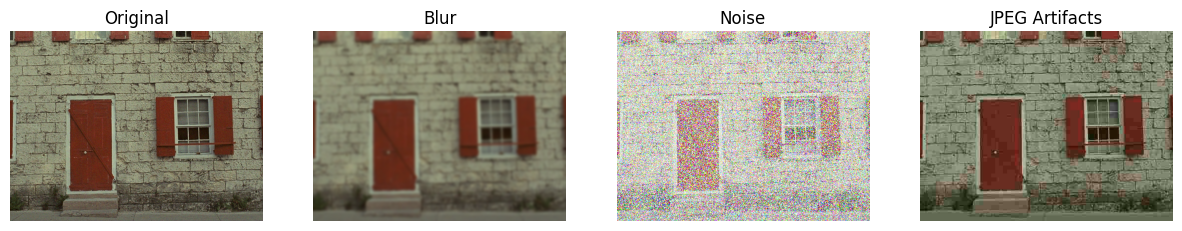

In [35]:
from brisque import BRISQUE
from niqe import niqe

# Beetaloninės kokybės metrikos

def compute_brisque_score(img):
    brisque_model = BRISQUE()
    return brisque_model.score(img)

def compute_niqe_score(img):
    return niqe(img)

# Analizuojame ir vizualizuojame pirmą vaizdą
def analyze_first_image():
    if image_files:
        first_image_path = os.path.join(image_folder_path, image_files[0])
        img = cv2.imread(first_image_path)

        # Taikome artefaktus
        blur_img = apply_blur(img)
        noisy_img = add_noise(img)
        jpeg_img = apply_jpeg_artifacts(img)

        # Skaičiuojame PSNR ir SSIM
        print("--- Kokybės metrikų palyginimas ---")
        for distorted_img, name in zip([blur_img, noisy_img, jpeg_img], ["Blur", "Noise", "JPEG Artifacts"]):
            psnr_value, ssim_value = compute_quality_metrics(img, distorted_img)
            brisque_score = compute_brisque_score(distorted_img)
            #niqe_score = compute_niqe_score(distorted_img)
            #print(f"{name}: PSNR={psnr_value:.2f}, SSIM={ssim_value:.4f}, BRISQUE={brisque_score:.2f}, NIQE={niqe_score:.2f}")
            print(f"{name}: PSNR={psnr_value:.2f}, SSIM={ssim_value:.4f}, BRISQUE={brisque_score:.2f}")

        visualize_artifacts(img)
    else:
        print("Nėra vaizdų analizės atlikimui.")

analyze_first_image()


## 5. Tekstūrų analizė ir kokybės požymių skaičiavimas
Naudokite Haralick tekstūrų požymius iš mahotas arba alternatyvios bibliotekos.   
Pritaikykite Gabor filtrus tekstūrų aptikimui.

Haralick tekstūrų požymiai:
[ 1.60809824e-04  6.06266739e+02  8.02469107e-01  1.53449912e+03
  8.61397218e-02  2.18850144e+02  5.53172975e+03  8.04842059e+00
  1.33463394e+01  1.19907790e-04  5.49347127e+00 -1.35415515e-01
  9.20089504e-01]

Griukomatrikos požymiai:
Kontrastas: 362.6555, Energija: 0.0136, Homogenija: 0.1007


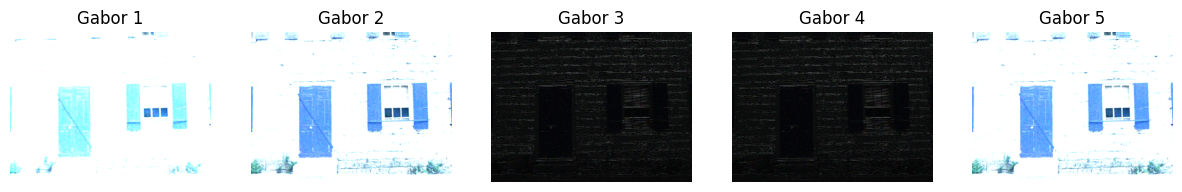

In [36]:
import mahotas
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# 5. Gabor filtrų taikymas tekstūrų aptikimui
def apply_gabor_filters(img):
    # Gabor filtro parametrai
    num_filters = 5
    theta = np.linspace(0, np.pi, num_filters, endpoint=False)  # Kampai
    sigma = 1.0
    frequency = 0.1
    gabor_responses = []

    # Filtruojame vaizdą pagal kiekvieną kampą
    for angle in theta:
        kernel = cv2.getGaborKernel((21, 21), sigma, angle, frequency, 1, 0, ktype=cv2.CV_32F)
        filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        gabor_responses.append(filtered_img)
    
    return gabor_responses

# 6. Haralick tekstūrų požymiai naudojant mahotas
def compute_haralick_features(img):
    # Paverčiame į pilką vaizdą
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Naudojame mahotas biblioteką, kad gautume Haralick tekstūrų požymius
    return mahotas.features.haralick(img_gray).mean(axis=0)

# 7. Griukomatrikos funkcijos naudojimas tekstūrų požymiams
def compute_glcm_features(img):
    # Paverčiame į pilką vaizdą
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Sukuriame griukomatriką (gray-level co-occurrence matrix) su nustatytais parametrais
    glcm = graycomatrix(img_gray, [1], [0], symmetric=True, normed=True)
    # Skaičiuojame kelis griukomatrikos požymius, pvz., kontrastą ir energiją
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    return contrast, energy, homogeneity

# 8. Funkcija, kuri analizuoja ir pateikia rezultatus
def analyze_first_image():
    if image_files:
        first_image_path = os.path.join(image_folder_path, image_files[0])
        img = cv2.imread(first_image_path)

        if img is None:
            print(f"Klaida nuskaitant vaizdą: {first_image_path}")
            return

        # Gabor filtrų taikymas
        gabor_responses = apply_gabor_filters(img)

        # Haralick požymių apskaičiavimas
        haralick_features = compute_haralick_features(img)
        print("Haralick tekstūrų požymiai:")
        print(haralick_features)

        # Griukomatrikos požymių apskaičiavimas
        contrast, energy, homogeneity = compute_glcm_features(img)
        print("\nGriukomatrikos požymiai:")
        print(f"Kontrastas: {contrast:.4f}, Energija: {energy:.4f}, Homogenija: {homogeneity:.4f}")

        # Vizualizuojame Gabor filtrų atsakymus
        titles = [f"Gabor {i+1}" for i in range(len(gabor_responses))]
        plt.figure(figsize=(15, 5))
        for i, response in enumerate(gabor_responses):
            plt.subplot(1, len(gabor_responses), i+1)
            plt.imshow(response, cmap='gray')
            plt.axis('off')
            plt.title(titles[i])
        plt.show()

    else:
        print("Nėra vaizdų analizės atlikimui.")

# Analizuojame pirmą vaizdą
analyze_first_image()

## 6. Vaizdų ryškumo analizė
Pritaikykite Laplacian filtrą vaizdų ryškumo matavimui.
Parašykite funkciją, kuri nustato, ar vaizdas per daug sulietas.

Ryškumo reikšmė: 574.33
Vaizdas nėra sulietas.


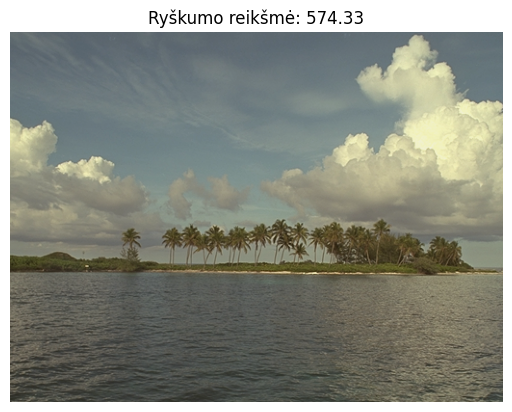

In [37]:

# 1. Funkcija Laplacian filtrui pritaikyti ir ryškumui įvertinti
def compute_sharpness(image):
    # Paverčiame į pilką vaizdą, jei jis yra spalvotas
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Pritaikome Laplacian filtrą
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

    # Apskaičiuojame standartinį nuokrypį (ryškumą)
    sharpness = laplacian.var()  # Variacija (nuokrypis) parodo ryškumą

    return sharpness

# 2. Funkcija, kuri nustato, ar vaizdas yra per daug sulietas
def is_blurry(image, threshold=100):
    # Apskaičiuojame ryškumą
    sharpness = compute_sharpness(image)

    # Patikriname, ar ryškumas yra mažesnis už nustatytą ribą (threshold)
    if sharpness < threshold:
        return True
    else:
        return False

# 3. Vaizdų analizė ir rodymas
def analyze_image_sharpness(image_path):
    # Nuskaityti vaizdą
    img = cv2.imread(image_path)

    if img is None:
        print(f"Klaida nuskaitant vaizdą: {image_path}")
        return

    # Pritaikome Laplacian filtrą ir įvertiname ryškumą
    sharpness = compute_sharpness(img)
    print(f"Ryškumo reikšmė: {sharpness:.2f}")

    # Patikriname, ar vaizdas yra sulietas
    if is_blurry(img):
        print("Vaizdas per daug sulietas.")
    else:
        print("Vaizdas nėra sulietas.")

    # Atvaizduoti originalų vaizdą
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Ryškumo reikšmė: {sharpness:.2f}")
    plt.show()

# Pavyzdys su pirmu vaizdu
image_path = os.path.join(image_folder_path, image_files[1880])
analyze_image_sharpness(image_path)

## 7. Spalvų analizė ir vizualinis kokybės įvertinimas
Išskaičiuokite spalvų histogramas (HSV, RGB, LAB erdvėse).   
Palyginkite histogramas tarp skirtingos kokybės vaizdų.